In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
width = height = 75

In [11]:
def load_and_format(path):
    print(path)
    df = pd.read_json(path)
    images = df.apply(lambda c_row: [np.stack([c_row['band_1'], c_row['band_2']], -1).reshape((height, width, 2))],1)
    images = np.stack(images).squeeze()
    return df, images

In [13]:
df, train = load_and_format(os.path.join('data', 'train.json'))
train.shape

data/train.json


(1604, 75, 75, 2)

In [14]:
def normalize(images):
    val_max = np.amax(images, axis=(0,1,2))
    val_min = np.amin(images, axis=(0,1,2))

    im = []
    for row in images:
        # Rescale
        b1 = (row[:,:,0] - val_min[0]) / (val_max[0] - val_min[0])
        b2 = (row[:,:,1] - val_min[1]) / (val_max[1] - val_min[1])

        im.append(np.dstack((b1, b2)))
    return np.array(im)

In [15]:
train_norm = normalize(train)
train_norm.shape

(1604, 75, 75, 2)

In [16]:
train_norm[0]

array([[[ 0.22098325,  0.28113435],
        [ 0.23001664,  0.24491221],
        [ 0.21112595,  0.22222998],
        ..., 
        [ 0.24973336,  0.25163736],
        [ 0.23831764,  0.24486678],
        [ 0.18819452,  0.27569978]],

       [[ 0.21112701,  0.22223123],
        [ 0.22098275,  0.18426091],
        [ 0.2255933 ,  0.21371187],
        ..., 
        [ 0.23831817,  0.17273192],
        [ 0.21108919,  0.26421622],
        [ 0.17463381,  0.29124535]],

       [[ 0.21112701,  0.18426161],
        [ 0.23001664,  0.13074568],
        [ 0.24609657,  0.21371187],
        ..., 
        [ 0.22997989,  0.21366766],
        [ 0.22094543,  0.20456102],
        [ 0.15912966,  0.24486614]],

       ..., 
       [[ 0.20583353,  0.2701203 ],
        [ 0.21111911,  0.27011966],
        [ 0.18822447,  0.23776657],
        ..., 
        [ 0.19438152,  0.30947206],
        [ 0.24605297,  0.27569209],
        [ 0.23831027,  0.25806733]],

       [[ 0.1746648 ,  0.24490387],
        [ 0.22097538,  

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.matshow(train[0,:,:,0])
ax2.matshow(train_norm[0,:,:,0])

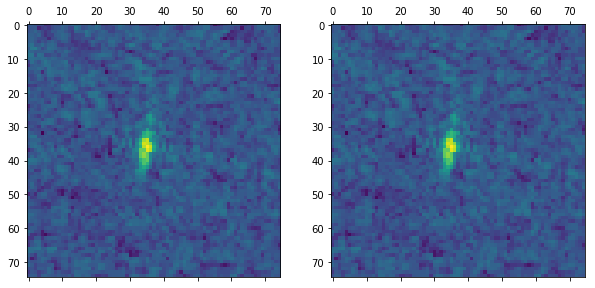

In [28]:
plt.show()